##**Άσκηση 2**

In [33]:
import numpy as np

#define a priori probabilities as given
apriori = [1/4,3/4]

#roots found in the first question
roots = [1.075,2.258]

#define number of samples
num_of_samples = 10000

#split and create based on apriori probabilities samples for w1 and w2
w1_samples_num = apriori[0] * num_of_samples #w1 samples
w2_samples_num = apriori[1] * num_of_samples #w2 samples

#create random samples using normal distribution
w1 = np.random.normal(2,np.sqrt(0.5),int(w1_samples_num))
w2 = np.random.normal(1.8,np.sqrt(0.2),int(w2_samples_num))

#counters initialization to count correct and wrong classifications
recognised_wrong_w1 = 0
recognised_wrong_w2 = 0
recognised_correct_w1 = 0
recognised_correct_w2 = 0

#check for w1 how many samples recognised correctly
for i in w1:
  if i > roots[0] and i < roots[1]:
    recognised_wrong_w1 = recognised_wrong_w1 + 1
  else:
    recognised_correct_w1 = recognised_correct_w1 + 1

#check for w2 how many samples recognised correctly
for j in w2:
  if j > roots[0] and j < roots[1]:
    recognised_correct_w2 = recognised_correct_w2  + 1
  else:
    recognised_wrong_w2 = recognised_wrong_w2 + 1

#check in given samples the probabilities
correct_w1 = recognised_correct_w1 / w1_samples_num
correct_w2 = recognised_correct_w2 / w2_samples_num
wrong_w1 = recognised_wrong_w1 / w1_samples_num
wrong_w2 = recognised_wrong_w2 / w2_samples_num

#define cost as described in the report
cost = apriori[0] * ((0 * correct_w1) + (3 * wrong_w1)) + \
apriori[1] * ((1 * wrong_w2) + (0* correct_w2))

print(f"For w1 successfully classified {round(correct_w1*100,2)} %")
print(f"For w2 successfully classified {round(correct_w2*100,2)} %")
print(f"The cost is {cost}")

For w1 successfully classified 45.52 %
For w2 successfully classified 79.71 %
The cost is 0.5608


##**Άσκηση 3 a)**

In [34]:
import math
import numpy as np

def discriminant_func(x,m,dim,covariance_matrix,apriori):
  var1 = x-m
  if dim != 1:
    det_cov_mat = np.linalg.det(covariance_matrix)
    return -0.5*np.matmul(np.matmul(np.transpose(var1),np.linalg.inv(covariance_matrix)),var1) \
    - (dim/2)*math.log(2*math.pi) - 0.5*math.log(det_cov_mat) + math.log(apriori)
  else:
    det_cov_mat = abs(covariance_matrix)
    return -0.5*(var1)*(covariance_matrix)**(-1)*var1 \
    - (dim/2)*math.log(2*math.pi) - 0.5*math.log(det_cov_mat) + math.log(apriori)

def euclidean_distance(x,y,dim):
  if dim != 1:
    return np.sqrt(np.matmul(np.transpose(x-y),(x-y)))
  else:
    return abs(x-y)

def mahalanobis_distance(x,m,covariance_matrix,dim):
  var1 = x-m
  if dim != 1:
    return np.sqrt(np.matmul(np.matmul(np.transpose(var1),np.linalg.inv(covariance_matrix)),var1))
  else:
    return np.sqrt(var1*(covariance_matrix**(-1))*var1)

##**Άσκηση 3 b)**

In [35]:
import numpy as np

# Specify the file path
file_path = '/content/data.csv'

#import data in an array skiping the first line
total_data = np.genfromtxt(file_path, delimiter = ',', skip_header=1)

#split data for each class
data_w1 = total_data[0:39,0:3]
data_w2 = total_data[39:79,0:3]
data_w3 = total_data[79:,0:3]
class_data = total_data[:,3]

#for x1
x1_mean_w1 = np.mean(data_w1[:,0])
x1_cov_w1 = np.cov(data_w1[:,0],rowvar = False)

x1_mean_w2 = np.mean(data_w2[:,0])
x1_cov_w2 = np.cov(data_w2[:,0],rowvar = False)

x1_mean_w3 = np.mean(data_w3[:,0])
x1_cov_w3 = np.cov(data_w3[:,0],rowvar = False)

#for x1,x2
x1x2_mean_w1 = np.mean(data_w1[:,0:2],axis = 0)
x1x2_cov_w1 = np.cov(data_w1[:,0:2],rowvar = False)

x1x2_mean_w2 = np.mean(data_w2[:,0:2],axis = 0)
x1x2_cov_w2 = np.cov(data_w2[:,0:2],rowvar = False)

x1x2_mean_w3 = np.mean(data_w3[:,0:2],axis = 0)
x1x2_cov_w3 = np.cov(data_w3[:,0:2],rowvar = False)

#for x1,x2,x3
x1x2x3_mean_w1 = np.mean(data_w1[:,0:3],axis = 0)
x1x2x3_cov_w1 = np.cov(data_w1[:,0:3],rowvar = False)

x1x2x3_mean_w2 = np.mean(data_w2[:,0:3],axis = 0)
x1x2x3_cov_w2 = np.cov(data_w2[:,0:3],rowvar = False)

x1x2x3_mean_w3 = np.mean(data_w3[:,0:3],axis = 0)
x1x2x3_cov_w3 = np.cov(data_w3[:,0:3],rowvar = False)

##**Άσκηση 3 c)**

In [36]:
#store row size for each class
data_w1_rows = data_w1.shape[0]
data_w2_rows = data_w2.shape[0]
data_w3_rows = data_w3.shape[0]

#for class1
g1 = np.zeros((data_w1_rows,1))
g2 = np.zeros((data_w1_rows,1))
wrong_pred = 0
for i in range(0,data_w1_rows):
  g1[i,0] = discriminant_func(data_w1[i,0],x1_mean_w1,1,x1_cov_w1,0.5)
  g2[i,0] = discriminant_func(data_w1[i,0],x1_mean_w2,1,x1_cov_w2,0.5)
  if(g1[i,0] < g2[i,0]):
    wrong_pred = wrong_pred + 1

#for class2
g3 = np.zeros((data_w2_rows,1))
g4 = np.zeros((data_w2_rows,1))
for i in range(0,data_w2_rows):
  g3[i,0] = discriminant_func(data_w2[i,0],x1_mean_w1,1,x1_cov_w1,0.5)
  g4[i,0] = discriminant_func(data_w2[i,0],x1_mean_w2,1,x1_cov_w2,0.5)
  if(g3[i,0] > g4[i,0]):
    wrong_pred = wrong_pred + 1

tot_class_error = wrong_pred/(data_w1_rows + data_w2_rows)
print(f"Classification Error using only x1 is {tot_class_error}")

Classification Error using only x1 is 0.4050632911392405


##**Άσκηση 3 d)**

In [37]:
#for x1,x2

#for class1
g1 = np.zeros((data_w1_rows,1))
g2 = np.zeros((data_w1_rows,1))
wrong_pred = 0
for i in range(0,data_w1_rows):
  g1[i,0] = discriminant_func(data_w1[i,0:2],x1x2_mean_w1,2,x1x2_cov_w1,0.5)
  g2[i,0] = discriminant_func(data_w1[i,0:2],x1x2_mean_w2,2,x1x2_cov_w2,0.5)
  if(g1[i,0] < g2[i,0]):
    wrong_pred = wrong_pred + 1

#for class2
g3 = np.zeros((data_w2_rows,1))
g4 = np.zeros((data_w2_rows,1))
for i in range(0,data_w2_rows):
  g3[i,0] = discriminant_func(data_w2[i,0:2],x1x2_mean_w1,2,x1x2_cov_w1,0.5)
  g4[i,0] = discriminant_func(data_w2[i,0:2],x1x2_mean_w2,2,x1x2_cov_w2,0.5)
  if(g3[i,0] > g4[i,0]):
    wrong_pred = wrong_pred + 1

tot_class_error = wrong_pred/(data_w1_rows + data_w2_rows)
print(f"Classification Error using x1,x2 is {tot_class_error}")

#for x1,x2,x3

#for class1
g1 = np.zeros((data_w1_rows,1))
g2 = np.zeros((data_w1_rows,1))
wrong_pred = 0
for i in range(0,data_w1_rows):
  g1[i,0] = discriminant_func(data_w1[i,0:3],x1x2x3_mean_w1,3,x1x2x3_cov_w1,0.5)
  g2[i,0] = discriminant_func(data_w1[i,0:3],x1x2x3_mean_w2,3,x1x2x3_cov_w2,0.5)
  if(g1[i,0] < g2[i,0]):
    wrong_pred = wrong_pred + 1

#for class2
g3 = np.zeros((data_w2_rows,1))
g4 = np.zeros((data_w2_rows,1))
for i in range(0,data_w2_rows):
  g3[i,0] = discriminant_func(data_w2[i,0:3],x1x2x3_mean_w1,3,x1x2x3_cov_w1,0.5)
  g4[i,0] = discriminant_func(data_w2[i,0:3],x1x2x3_mean_w2,3,x1x2x3_cov_w2,0.5)
  if(g3[i,0] > g4[i,0]):
    wrong_pred = wrong_pred + 1

tot_class_error = wrong_pred/(data_w1_rows + data_w2_rows)
print(f"Classification Error using x1,x2,x3 is {tot_class_error}")

Classification Error using x1,x2 is 0.379746835443038
Classification Error using x1,x2,x3 is 0.21518987341772153


##**Άσκηση 3 e)**

In [38]:
#for x1,x2,x3

#for class1
g1 = np.zeros((data_w1_rows,1))
g2 = np.zeros((data_w1_rows,1))
g3 = np.zeros((data_w1_rows,1))
wrong_pred = 0
for i in range(0,data_w1_rows):
  g1[i,0] = discriminant_func(data_w1[i,0:3],x1x2x3_mean_w1,3,x1x2x3_cov_w1,0.8)
  g2[i,0] = discriminant_func(data_w1[i,0:3],x1x2x3_mean_w2,3,x1x2x3_cov_w2,0.1)
  g3[i,0] = discriminant_func(data_w1[i,0:3],x1x2x3_mean_w3,3,x1x2x3_cov_w3,0.1)
  if(g1[i,0] < g2[i,0]) or (g1[i,0] < g3[i,0]):
    wrong_pred = wrong_pred + 1

#for class2
g4 = np.zeros((data_w2_rows,1))
g5 = np.zeros((data_w2_rows,1))
g6 = np.zeros((data_w2_rows,1))
for i in range(0,data_w2_rows):
  g4[i,0] = discriminant_func(data_w2[i,0:3],x1x2x3_mean_w1,3,x1x2x3_cov_w1,0.8)
  g5[i,0] = discriminant_func(data_w2[i,0:3],x1x2x3_mean_w2,3,x1x2x3_cov_w2,0.1)
  g6[i,0] = discriminant_func(data_w2[i,0:3],x1x2x3_mean_w3,3,x1x2x3_cov_w3,0.1)
  if(g5[i,0] < g4[i,0]) or (g5[i,0] < g6[i,0]):
    wrong_pred = wrong_pred + 1

#for class3
g7 = np.zeros((data_w3_rows,1))
g8 = np.zeros((data_w3_rows,1))
g9 = np.zeros((data_w3_rows,1))
for i in range(0,data_w3_rows):
  g7[i,0] = discriminant_func(data_w3[i,0:3],x1x2x3_mean_w1,3,x1x2x3_cov_w1,0.8)
  g8[i,0] = discriminant_func(data_w3[i,0:3],x1x2x3_mean_w2,3,x1x2x3_cov_w2,0.1)
  g9[i,0] = discriminant_func(data_w3[i,0:3],x1x2x3_mean_w3,3,x1x2x3_cov_w3,0.1)
  if(g9[i,0] < g8[i,0]) or (g9[i,0] < g7[i,0]):
    wrong_pred = wrong_pred + 1

tot_class_error = wrong_pred/(data_w1_rows + data_w2_rows + data_w3_rows)
print(f"Classification Error using x1,x2,x3 is {tot_class_error}")

Classification Error using x1,x2,x3 is 0.55


##**Άσκηση 4**

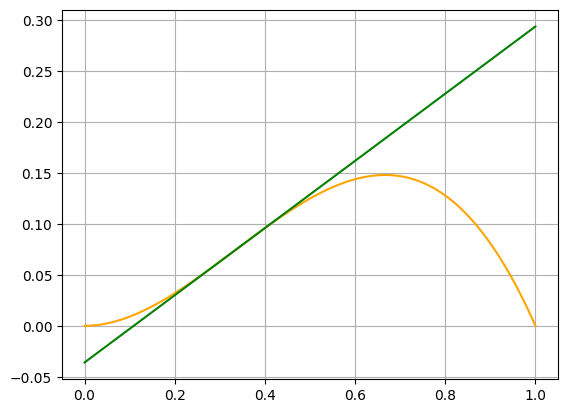

F function has maximum value: 0.14814814814814817 at x: 0.666
The error probability for P1 = 0.7 is 0.19523123123123123


In [39]:
import numpy as np
import matplotlib.pyplot as plt

#create x values
x = np.linspace(0,1,1000)

# Calculate y values using the function y = x^2 * (1-x)
y = x**2 * (1 - x)
new_line = 0.33*x - 9/250

x_max = np.argmax(y)
max = np.max(y)

# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y, 'orange')
ax.plot(x, new_line, 'green')
plt.grid(True)
plt.show()

print(f"F function has maximum value: {max} at x: {x_max/1000}")
print(f"The error probability for P1 = 0.7 is {new_line[700]}")

##**Άσκηση 5**

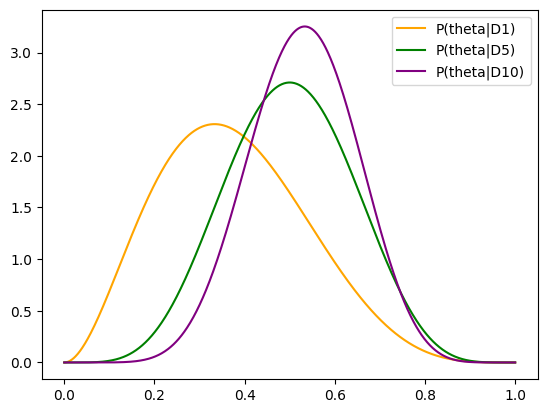

Integral for p_th[0] = 1.0
Integral for p_th[1] = 1.0
Integral for p_th[2] = 1.0
The maximum value is 3.251919687635525 for x = 0.533


In [40]:
import numpy as np
import matplotlib.pyplot as plt

#define theta distribution function as given
def theta_distr(theta1):
  return 30*theta1*(1-theta1)**4

#define p(theta|D^N) numerator
def numerator(theta1,k):
  return (theta1**k)*((1-theta1)**(N-k))*theta_distr(theta1)

#define p(theta|D^N) denominator
def denominator(theta1,k):
  return np.trapz(numerator(theta1,k),dx = 1/1000)

#define flip results given (1-> heads 0-> tails)
flips = np.array([1,0,1,1,1,0,1,1,0,1])

#create an array to store all samples for D^1,D^5,D^10
p_th = np.zeros((3, 1000))

#calculate for N = 1,5,10 p(theta|D^N)
theta = np.linspace(0,1,1000)
temp1 = 0 #temporary variable to help indicate the right array line
for N in (1,5,10):
  k = flips[0:N].sum()
  p_th[temp1, :] = numerator(theta, k) / denominator(theta, k)
  temp1 = temp1 + 1

#plot the result
fig, ax = plt.subplots()
ax.plot(theta, p_th[0], 'orange', label="P(theta|D1)")
ax.plot(theta, p_th[1], 'green', label="P(theta|D5)")
ax.plot(theta, p_th[2], 'purple', label="P(theta|D10)")
ax.legend()
plt.show()

#check if the integrals are equal to 1
for t in (0,1,2):
  print(f"Integral for p_th[{t}] = {round(np.trapz(p_th[t,:],dx = 1/1000),6)}")

#find where the maximum value for P(theta|D^10) appears
print(f"The maximum value is {np.max(p_th[2,:])} for x = {np.argmax(p_th[2,:])/1000}")